# RLab05 - Gabriele Bertinelli (2103359)

In [1]:
library(tidyverse)
library(gridExtra)
library(latex2exp)
library(emdbook)
library(bayestestR)
library(coda)
library(magrittr)
library(rjags)

set.seed(2103359)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Caricamento pacchetto: 'gridExtra'


Il seguente oggetto è mascherato da 'package:dplyr':

    combine



Caricamento pacchetto: 'magrittr'


Il seguente oggetto è mascherato da 'package:purrr':

    set_names


Il seguente oggetto è mascherato da 'package:tidyr':

    extract


Linked to JAGS 4.3.1

Loaded modules: basemod,bugs



#### 1)  
**1.1)**

In [31]:
# sets of observations
n1 <- c(rep(0, times=109), rep(1, times = 65), rep(2, times=22), rep(3, times=3), rep(4, times=1))
n2 <- c(rep(0, times=144), rep(1, times = 91), rep(2, times=32), rep(3, times=11), rep(4, times=2))

delta.t <- 0.001
lambda_list <- seq(from=0, to=7, by=delta.t)

#likelihood for the two observation is poisson
poisson <- function(ni, lambda_list){
                pi_like <- 1 #rep(1, times = length(lambda_list))
                for (n in ni){
                    pi_like <- pi_like * dpois(x=n, lambda=lambda_list)
                }
                return(pi_like)
            }

#compute the two likelihood separatly for the two observation
p1_like <- poisson(n1,  lambda_list)
p2_like <- poisson(n2,  lambda_list)

In [43]:
# posterior with uniform prior
p.post_star_unif1 <- p1_like * 1
p.post_unif1 <- p.post_star_unif1 / (sum(p.post_star_unif1)*delta.t)

my.median = function(mu, post, dt=0.001){
    for (i in seq(1, length(mu))){
        int  = sum(post[1:i]*dt)
        if (int>0.4999){med=mu[i]
                    break
        }
    }
    return(med)
}

mean_unif1 <- sum(p.post_unif1 * lambda_list)*delta.t
median_unif1 <- my.median(lambda_list, p.post_unif1)
variance_unif1 <- sum(((mean_unif1-lambda_list)^2)*p.post_unif1)*delta.t

lower_unif1 <- ncredint(lambda_list, p.post_unif1, level = 0.95)[['lower']]
upper_unif1 <- ncredint(lambda_list, p.post_unif1, level = 0.95)[['upper']]


p.post_star_unif2 <- p2_like * 1 
p.post_unif2 <- p.post_star_unif2 / (sum(p.post_star_unif2)*delta.t)

mean_unif2 <- sum(p.post_unif2 * lambda_list)*delta.t
median_unif2 <- my.median(lambda_list, p.post_unif2)
variance_unif2 <- sum(((mean_unif2-lambda_list)^2)*p.post_unif2)*delta.t

lower_unif2 <- ncredint(lambda_list, p.post_unif2, level = 0.95)[['lower']]
upper_unif2 <- ncredint(lambda_list, p.post_unif2, level = 0.95)[['upper']]


result_unif <- data.frame(
                mean = c(mean_unif1, mean_unif2), 
                median = c(median_unif1, median_unif2),
                variance = c(variance_unif1, variance_unif2),
                l.ci = c(lower_unif1, lower_unif2),
                u.ci = c(upper_unif1, upper_unif2),
                row.names = c('1st set', '2nd set')
                )

In [45]:
print(sprintf('Mean value Set 1: %.3f  -  Mean value Set 2: %.3f', result_unif$mean[1], result_unif$mean[2]))
print(sprintf('Median value Set 1: %.3f  -  Median value Set 2: %.3f', result_unif$median[1], result_unif$median[2]))
cat('\n')
print(sprintf('Variance Set 1: %.4f  -  Variance Set 2: %.4f', result_unif$variance[1], result_unif$variance[2]))
cat('\n')
print(sprintf('0.95 CI Set 1 [%.3f - %.3f]', result_unif$l.ci[1], result_unif$u.ci[1]))
print(sprintf('0.95 CI Set 2 [%.3f - %.3f]', result_unif$l.ci[2], result_unif$u.ci[2]))


[1] "Mean value Set 1: 0.615  -  Mean value Set 2: 0.704"
[1] "Median value Set 1: 0.613  -  Median value Set 2: 0.702"

[1] "Variance Set 1: 0.0031  -  Variance Set 2: 0.0025"

[1] "0.95 CI Set 1 [0.508 - 0.724]"
[1] "0.95 CI Set 2 [0.607 - 0.802]"


Warning message:
"Removed 6250 rows containing missing values or values outside the scale range (`geom_line()`)."
Warning message:
"Removed 6250 rows containing missing values or values outside the scale range (`geom_line()`)."


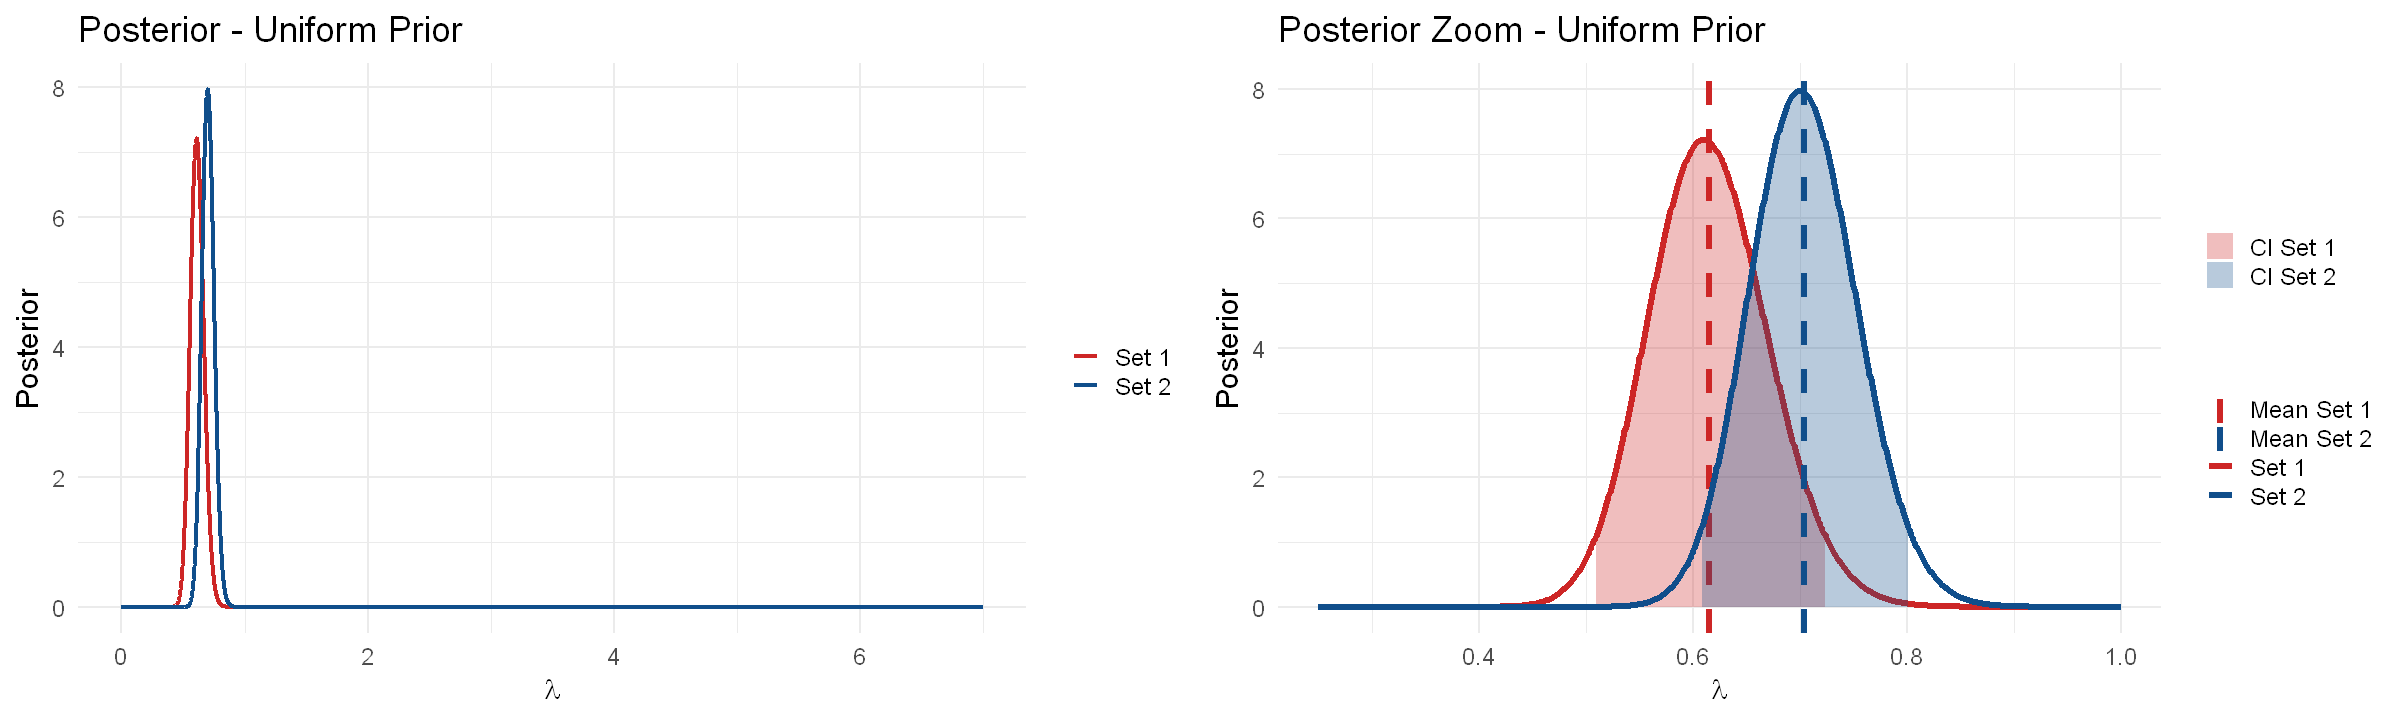

In [34]:
options(repr.plot.width = 20, repr.plot.height = 6)
# plot
unif.post.plot <- ggplot() +
        geom_line(aes(lambda_list, p.post_unif1, color='Set 1'), lwd=1.3) +
        geom_line(aes(lambda_list, p.post_unif2, color='Set 2'), lwd=1.3) +
        labs(x=(TeX(r'(\lambda)')), y ='Posterior', title='Posterior - Uniform Prior', color='') +
        theme_minimal(base_size=18) + 
        scale_color_manual(values = c('Set 1' = 'firebrick3', 'Set 2' = 'dodgerblue4'))

# zoom in plot
unif.post.plot.zoom <- ggplot() +
        geom_line(aes(lambda_list, p.post_unif1, color='Set 1'), lwd=1.7) + 
        geom_area(aes(x = lambda_list[lambda_list > lower_unif1 & lambda_list < upper_unif1], 
                      y = p.post_unif1[lambda_list > lower_unif1 & lambda_list < upper_unif1],
                      fill='CI Set 1'), alpha=0.3) +
        geom_vline(aes(xintercept=mean_unif1, color='Mean Set 1'), linetype='dashed', lwd=1.7) +

        geom_line(aes(lambda_list, p.post_unif2, color='Set 2'), lwd=1.7) + 
        geom_area(aes(x = lambda_list[lambda_list > lower_unif2 & lambda_list < upper_unif2], 
                      y = p.post_unif2[lambda_list > lower_unif2 & lambda_list < upper_unif2],
                      fill='CI Set 2'), alpha=0.3) +
        geom_vline(aes(xintercept=mean_unif2, color='Mean Set 2'), linetype='dashed', lwd=1.7) + 

        labs(x=(TeX(r'(\lambda)')), y ='Posterior', title='Posterior Zoom - Uniform Prior', color='', fill='') + 

        scale_color_manual(values = c('Set 1' = 'firebrick3', 'Mean Set 1' = 'firebrick3', 
                                      'Set 2' = 'dodgerblue4', 'Mean Set 2' = 'dodgerblue4')) +
        scale_fill_manual(values = c('CI Set 1' = 'firebrick3', 'CI Set 2' = 'dodgerblue4')) +
        theme_minimal(base_size = 18) +  

        ylim(0, 8) + xlim(0.25, 1)

grid.arrange(grobs=list(unif.post.plot, unif.post.plot.zoom), nrow=1, ncol=2)

**1.2)**

In [48]:
#posterior with Jeffrey prior
lambda_list <- seq(from=0.0001, to=10, by=delta.t)
p1_like <- poisson(n1,  lambda_list)
p2_like <- poisson(n2,  lambda_list)


p.post_star_Jeffrey1 <- p1_like * (1/sqrt(lambda_list))
p.post_Jeffrey1 <- p.post_star_Jeffrey1 / (sum(p.post_star_Jeffrey1)*delta.t)

mean_Jeffrey1 <- sum(p.post_Jeffrey1 * lambda_list)*delta.t
median_Jeffrey1 <- my.median(lambda_list, p.post_Jeffrey1)
variance_Jeffrey1 <- sum(((mean_Jeffrey1-lambda_list)^2)*p.post_Jeffrey1)*delta.t

lower_Jeffrey1 <- ncredint(lambda_list, p.post_Jeffrey1, level = 0.95)[['lower']]
upper_Jeffrey1 <- ncredint(lambda_list, p.post_Jeffrey1, level = 0.95)[['upper']]


p.post_star_Jeffrey2 <- p2_like * (1/sqrt(lambda_list)) 
p.post_Jeffrey2 <- p.post_star_Jeffrey2 / (sum(p.post_star_Jeffrey2)*delta.t)

mean_Jeffrey2 <- sum(p.post_Jeffrey2 * lambda_list)*delta.t
median_Jeffrey2 <- my.median(lambda_list, p.post_Jeffrey2)
variance_Jeffrey2 <- sum(((mean_Jeffrey2-lambda_list)^2)*p.post_Jeffrey2)*delta.t

lower_Jeffrey2 <- ncredint(lambda_list, p.post_Jeffrey2, level = 0.95)[['lower']]
upper_Jeffrey2 <- ncredint(lambda_list, p.post_Jeffrey2, level = 0.95)[['upper']]


result_jeff <- data.frame(
                mean = c(mean_Jeffrey1, mean_Jeffrey2), 
                median = c(median_Jeffrey1, median_Jeffrey2),
                variance = c(variance_Jeffrey1, variance_Jeffrey2),
                l.ci = c(lower_Jeffrey1, lower_Jeffrey2),
                u.ci = c(upper_Jeffrey1, upper_Jeffrey2),
                row.names = c('1st set', '2nd set')
                )

In [49]:
print(sprintf('Mean value Set 1: %.3f  -  Mean value Set 2: %.3f', result_jeff$mean[1], result_jeff$mean[2]))
print(sprintf('Median value Set 1: %.3f  -  Median value Set 2: %.3f', result_jeff$median[1], result_jeff$median[2]))
cat('\n')
print(sprintf('Variance Set 1: %.4f  -  Variance Set 2: %.4f', result_jeff$variance[1], result_jeff$variance[2]))
cat('\n')
print(sprintf('0.95 CI Set 1 [%.3f - %.3f]', result_jeff$l.ci[1], result_jeff$u.ci[1]))
print(sprintf('0.95 CI Set 2 [%.3f - %.3f]', result_jeff$l.ci[2], result_jeff$u.ci[2]))

[1] "Mean value Set 1: 0.612  -  Mean value Set 2: 0.702"
[1] "Median value Set 1: 0.611  -  Median value Set 2: 0.700"

[1] "Variance Set 1: 0.0031  -  Variance Set 2: 0.0025"

[1] "0.95 CI Set 1 [0.506 - 0.721]"
[1] "0.95 CI Set 2 [0.605 - 0.800]"


Warning message:
"Removed 9250 rows containing missing values or values outside the scale range (`geom_line()`)."
Warning message:
"Removed 9250 rows containing missing values or values outside the scale range (`geom_line()`)."


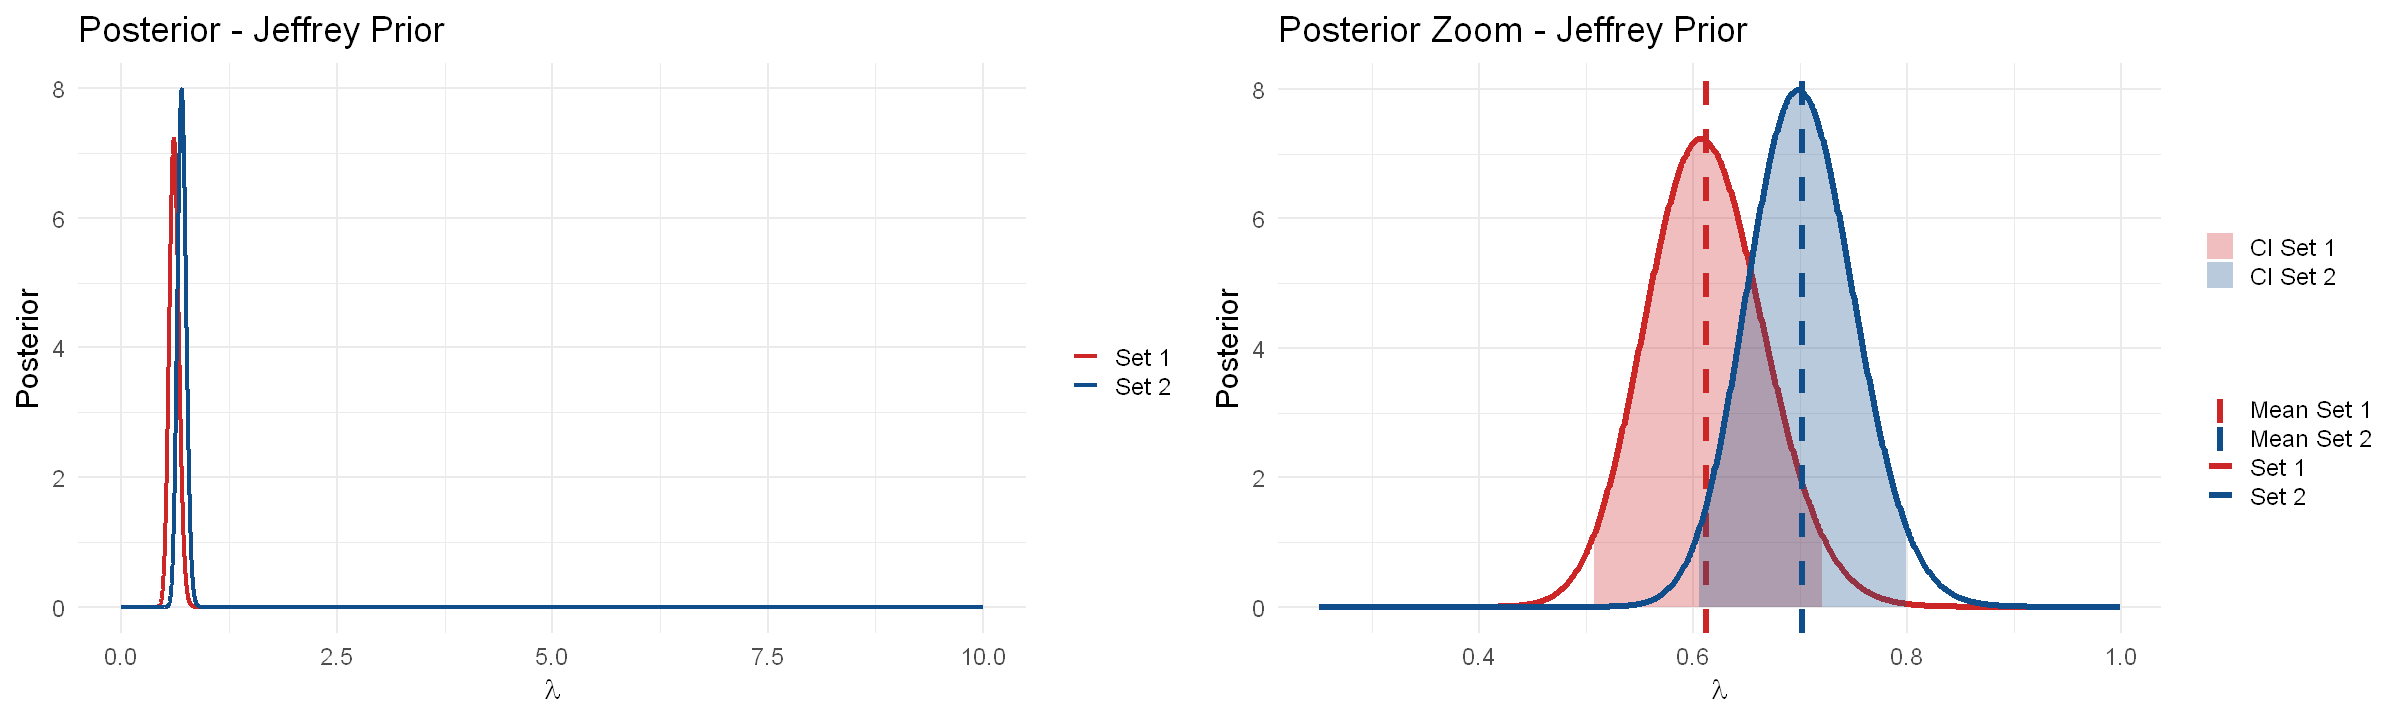

In [50]:
options(repr.plot.width = 20, repr.plot.height = 6)
# plot
jeff.post.plot <- ggplot() +
        geom_line(aes(lambda_list, p.post_Jeffrey1, color='Set 1'), lwd=1.3) +
        geom_line(aes(lambda_list, p.post_Jeffrey2, color='Set 2'), lwd=1.3) +
        labs(x=(TeX(r'(\lambda)')), y ='Posterior', title='Posterior - Jeffrey Prior', color='') +
        theme_minimal(base_size=18) + 
        scale_color_manual(values = c('Set 1' = 'firebrick3', 'Set 2' = 'dodgerblue4'))

# zoom in plot
jeff.post.plot.zoom <- ggplot() +
        geom_line(aes(lambda_list, p.post_Jeffrey1, color='Set 1'), lwd=1.7) + 
        geom_area(aes(x = lambda_list[lambda_list > lower_Jeffrey1 & lambda_list < upper_Jeffrey1], 
                      y = p.post_unif1[lambda_list > lower_Jeffrey1 & lambda_list < upper_Jeffrey1],
                      fill='CI Set 1'), alpha=0.3) +
        geom_vline(aes(xintercept=mean_Jeffrey1, color='Mean Set 1'), linetype='dashed', lwd=1.7) +

        geom_line(aes(lambda_list, p.post_Jeffrey2, color='Set 2'), lwd=1.7) + 
        geom_area(aes(x = lambda_list[lambda_list > lower_Jeffrey2 & lambda_list < upper_Jeffrey2], 
                      y = p.post_unif2[lambda_list > lower_Jeffrey2 & lambda_list < upper_Jeffrey2],
                      fill='CI Set 2'), alpha=0.3) +
        geom_vline(aes(xintercept=mean_Jeffrey2, color='Mean Set 2'), linetype='dashed', lwd=1.7) + 

        labs(x=(TeX(r'(\lambda)')), y ='Posterior', title='Posterior Zoom - Jeffrey Prior', color='', fill='') + 

        scale_color_manual(values = c('Set 1' = 'firebrick3', 'Mean Set 1' = 'firebrick3', 
                                      'Set 2' = 'dodgerblue4', 'Mean Set 2' = 'dodgerblue4')) +
        scale_fill_manual(values = c('CI Set 1' = 'firebrick3', 'CI Set 2' = 'dodgerblue4')) +
        theme_minimal(base_size = 18) +  

        ylim(0, 8) + xlim(0.25, 1)

grid.arrange(grobs=list(jeff.post.plot, jeff.post.plot.zoom), nrow=1, ncol=2)

#### 2)  
**Uniform prior**

In [53]:
data1 <- NULL
data1$X <- n1 # Set of observations

data2 <- NULL
data2$X<- n2 # Set of observations

In [54]:
model = 'jm_ex6.2_unif.bug'

jm1 <- jags.model(model, data1)
jm2 <- jags.model(model, data2)

#update the Markov chain (burn-in) and plot
update(jm1, 1000)
chain1 <- coda.samples(jm1, c('lambda','Y'), n.iter=10000)

update(jm2, 1000)
chain2 <- coda.samples(jm2, c('lambda', 'Y'), n.iter=10000)

cat(paste('Chain 1 summary'))
print(summary(chain1))

cat('\n\n\n')

cat(paste('Chain 2 summary'))
print(summary(chain2))

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 200
   Unobserved stochastic nodes: 2
   Total graph size: 203

Initializing model

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 280
   Unobserved stochastic nodes: 2
   Total graph size: 283

Initializing model

Chain 1 summary
Iterations = 1001:11000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

         Mean      SD  Naive SE Time-series SE
Y      0.6137 0.77816 0.0077816      0.0077816
lambda 0.6152 0.05543 0.0005543      0.0005543

2. Quantiles for each variable:

        2.5%    25%    50%    75%  97.5%
Y      0.000 0.0000 0.0000 1.0000 3.0000
lambda 0.511 0.5771 0.6143 0.6519 0.7271




Chain 2 summary
Iterations = 1001:11000
Thinning interval = 1 
Num

In [55]:
chain1.df <- as.data.frame(as.mcmc(chain1))
chain2.df <- as.data.frame(as.mcmc(chain2))

In [57]:
y.mean.1 <- summary(chain1)$statistics[1,1]
l.mean.1 <- summary(chain1)$statistics[2,1]
y.mean.2 <- summary(chain2)$statistics[1,1]
l.mean.2 <- summary(chain2)$statistics[2,1]

l.med.1 <- summary(chain1)$quantiles[2,3]
l.med.2 <- summary(chain2)$quantiles[2,3]

print(sprintf('Mean value Set 1: %.3f  -  Mean value Set 2: %.3f', l.mean.1, l.mean.2))
print(sprintf('Median value Set 1: %.3f  -  Median value Set 2: %.3f', l.med.1, l.med.2))
cat('\n')

l.lo.ci.1 <- summary(chain1)$quantiles[2,1]
l.up.ci.1 <- summary(chain1)$quantiles[2,5]
l.lo.ci.2 <- summary(chain2)$quantiles[2,1]
l.up.ci.2 <- summary(chain2)$quantiles[2,5]

print(sprintf('0.95 CI Set 1 [%.3f - %.3f]', l.lo.ci.1, l.up.ci.1))
print(sprintf('0.95 CI Set 2 [%.3f - %.3f]', l.lo.ci.2, l.up.ci.2))

[1] "Mean value Set 1: 0.615  -  Mean value Set 2: 0.703"
[1] "Median value Set 1: 0.614  -  Median value Set 2: 0.702"

[1] "0.95 CI Set 1 [0.511 - 0.727]"
[1] "0.95 CI Set 2 [0.609 - 0.805]"


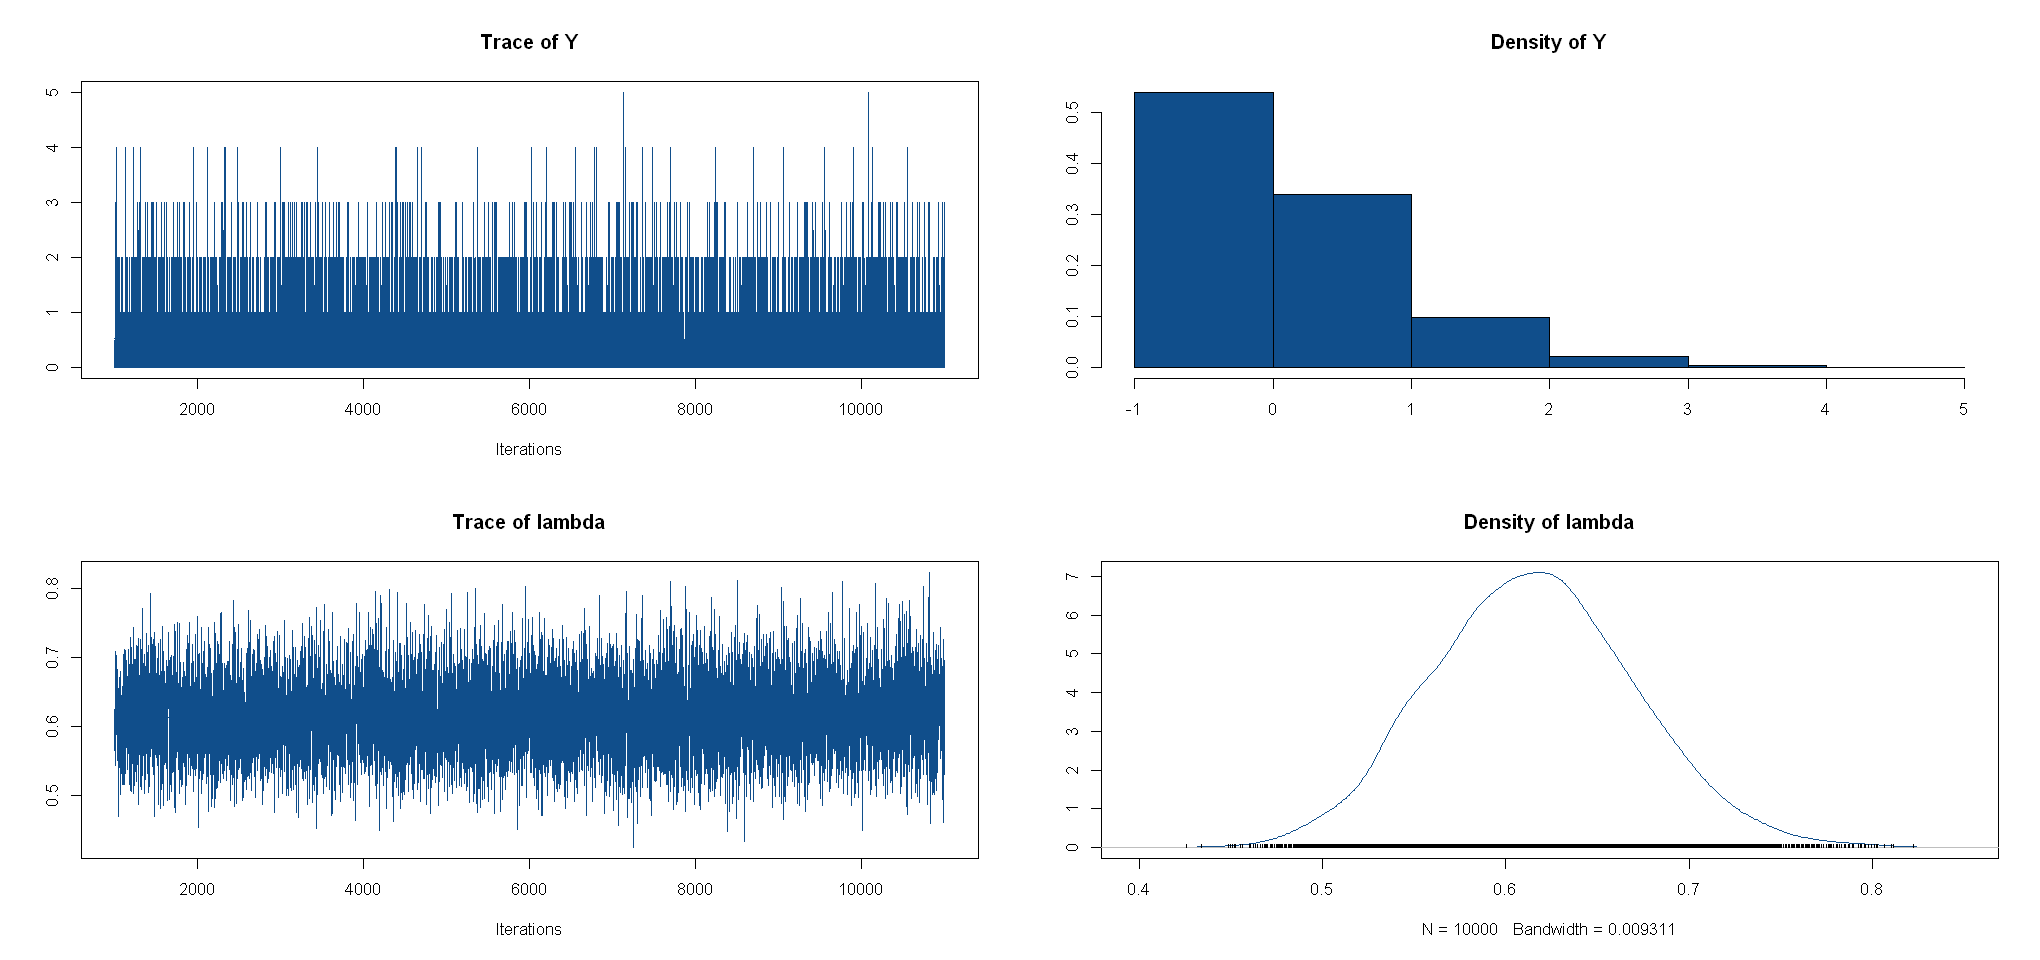

In [60]:
options(repr.plot.width = 17, repr.plot.height = 8)
plot(chain1, col='dodgerblue4')

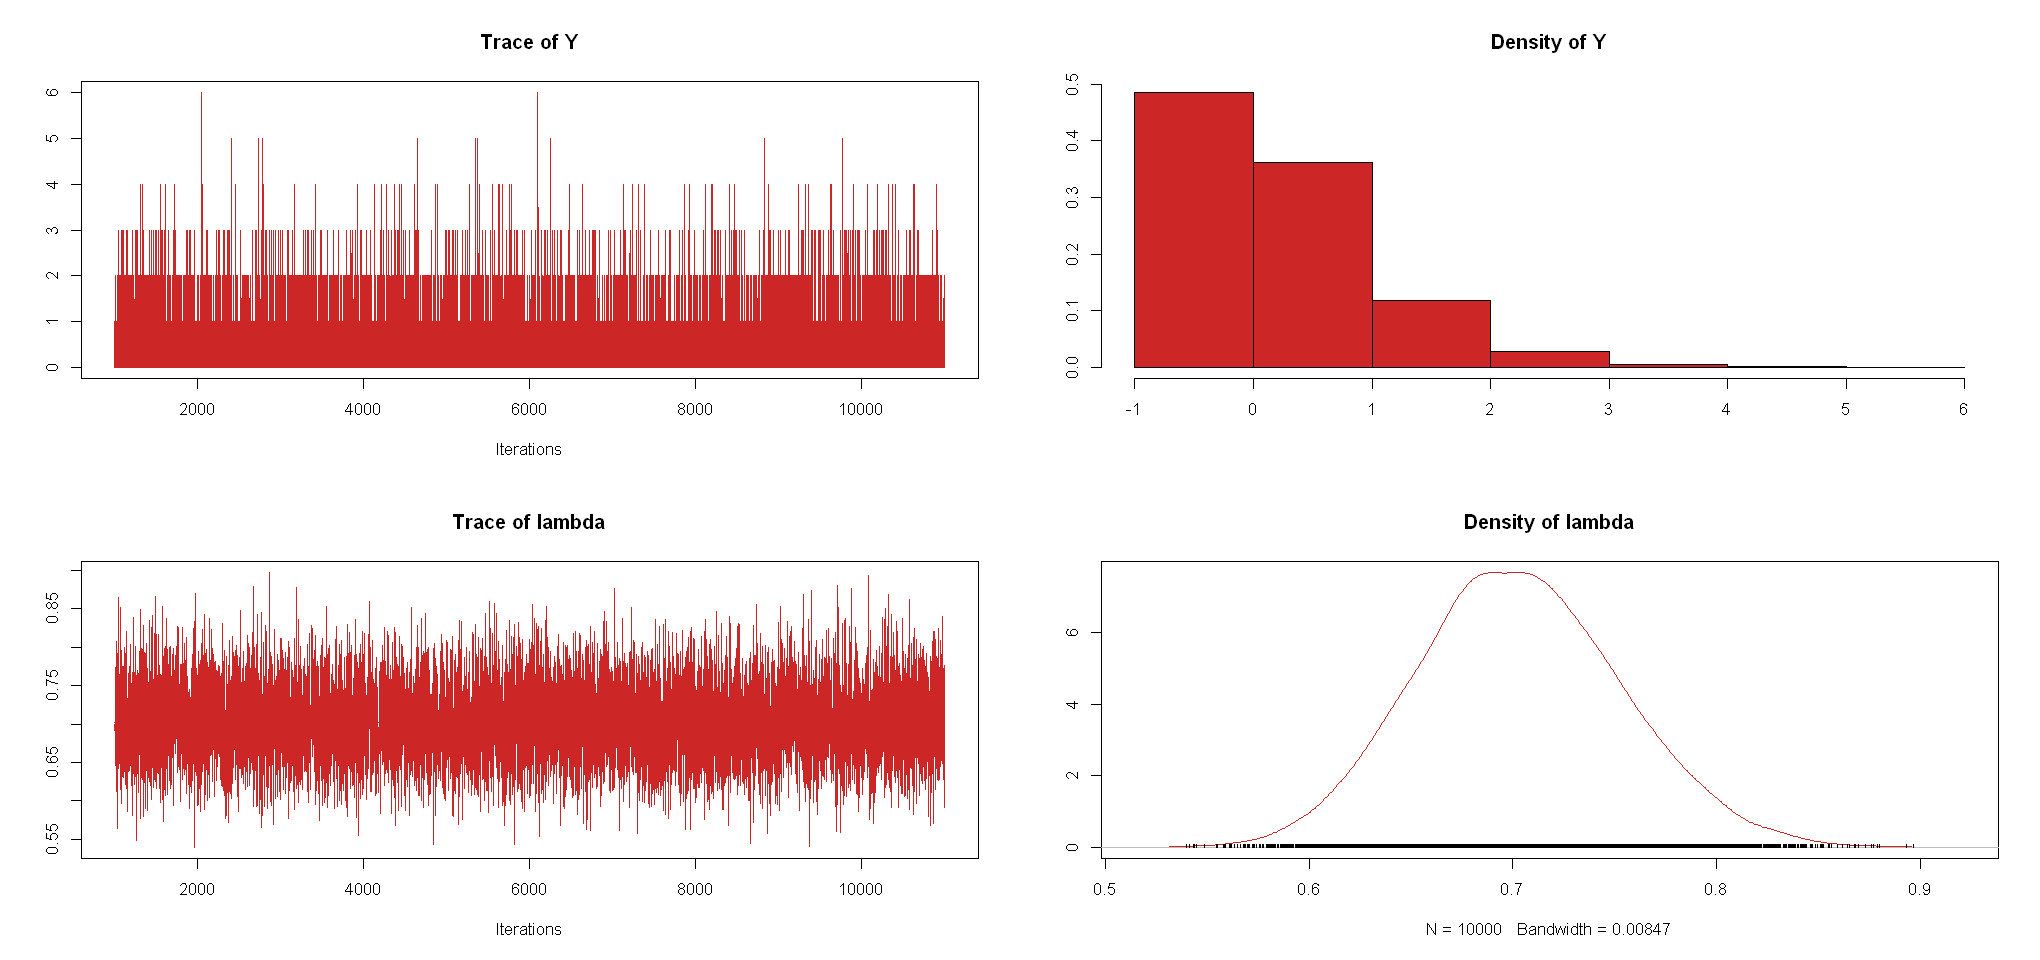

In [61]:
plot(chain2, col='firebrick3')

#### 3)

In [62]:
n <- 116 #n° of sample
y <- 11 #samples w/ hl bacteria 

**3.1)**

In [63]:
p_freq <- 11/116 

cat('The frequenties estimator is:', round(p_freq*100, 2), '%')

The frequenties estimator is: 9.48 %

**3.2)**

In [86]:
delta.t <- 0.0001
p <- seq(0, 1, by = delta.t) 

#Likelihood, Prior
p.beta_like <- dbinom(y, size=n, prob=p)
p.beta_prior <- dbeta(p, 1, 10)

#Posterior normalized
p.beta_post <- (p.beta_like * p.beta_prior)/(delta.t * sum(p.beta_like * p.beta_prior))

options(repr.plot.width=8, repr.plot.height=7)
#Plot
beta_post_plot <- ggplot() +
        geom_line(aes(x=p, y=p.beta_post), color='dodgerblue4', lwd=1.7) +
        labs(x='p', y='Posterior', title='Posterior from Beta prior') + 
        theme_minimal(base_size = 18)
# beta_post_plot

**3.3)**

mean,variance,l.ci,u.ci
<dbl>,<dbl>,<dbl>,<dbl>
0.09448819,0.0006684388,0.0467,0.1459


Warning message:
"Removed 8000 rows containing missing values or values outside the scale range (`geom_line()`)."


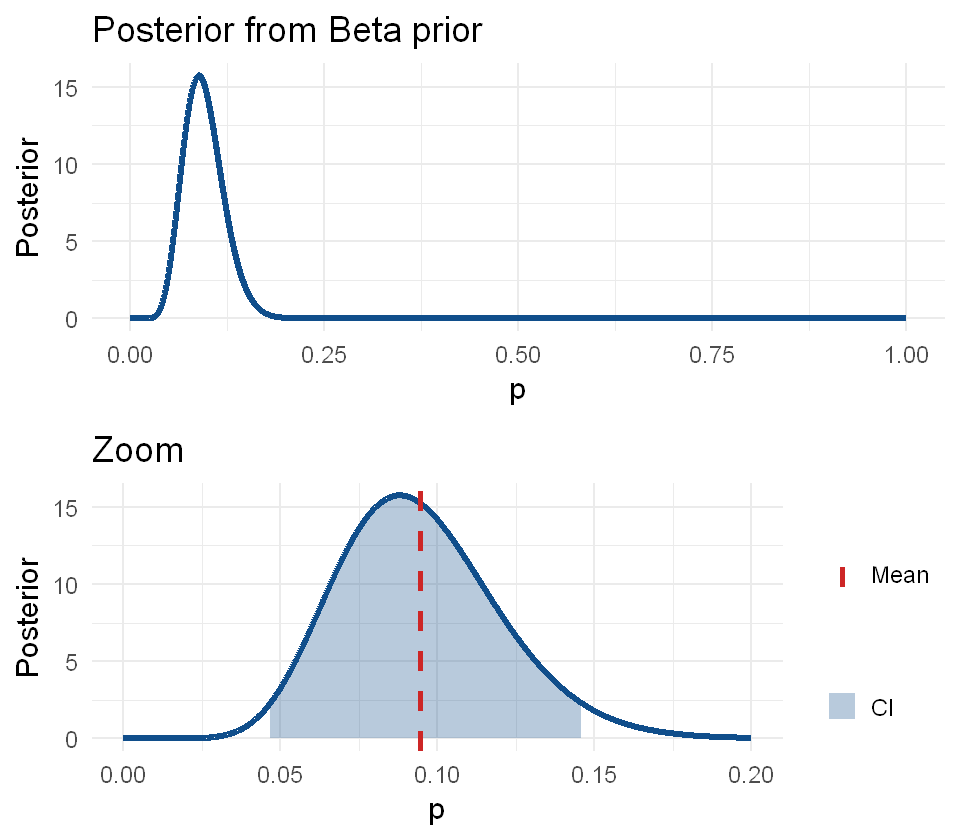

In [69]:
# Bayesian estimator for p 
beta_mean <- (sum(p.beta_post * p)) * delta.t
beta_var <- sum(((beta_mean - p)^2) *p.beta_post) * delta.t

beta_low <- ncredint(p, p.beta_post, level=0.95)[['lower']]
beta_up <- ncredint(p, p.beta_post, level=0.95)[['upper']]

beta_res <- tibble(
                mean = beta_mean,
                variance = beta_var,
                l.ci = beta_low,
                u.ci = beta_up
                )
beta_res

# zoomed plot
beta.plot.bayes <- beta_post_plot + 
        geom_area(aes(x = p[p>beta_low & p<beta_up],
                      y = p.beta_post[p>beta_low & p<beta_up],   
                      fill='CI'), alpha=0.3) +
        geom_vline(aes(xintercept = beta_mean, color='Mean'), linetype="dashed", linewidth=1.5) +
        scale_color_manual(values = c('Mean' = 'firebrick3')) + 
        scale_fill_manual(values = c('CI' = 'dodgerblue4')) +
        xlim(0, 0.2) +
        labs(title='Zoom', color='', fill='')

grid.arrange(grobs=list(beta_post_plot, beta.plot.bayes), nrow=2)

**3.4)**

**Frequentist approach**

In [83]:
#Frequentist Approach
alpha = 0.05
p = seq(0, n, 1)
p.freq = pbinom(p, n, prob=0.1, lower.tail = TRUE)

lower.limit = max(p[p.freq<=alpha/2])
upper.limit = min(p[p.freq>=1-alpha/2])

alpha.star = p.freq[lower.limit] + 1 - p.freq[upper.limit]
cat('The closest we can get to alpha=0.05 is: ', alpha.star, '\n')
cat('The lower and upper limit to the 95% interval are: (', lower.limit, ', ', upper.limit, ')\n')
cat('Since the number of successful events (',y,') fall whithin this range, we CANNOT reject the null hypotesis. ')

The closest we can get to alpha=0.05 is:  0.04761008 
The lower and upper limit to the 95% interval are: ( 5 ,  18 )
Since the number of successful events ( 11 ) fall whithin this range, we CANNOT reject the null hypotesis. 

Warning message:
"Removed 88 rows containing missing values or values outside the scale range (`geom_col()`)."
Warning message:
"Removed 1 row containing missing values or values outside the scale range (`geom_col()`)."
Warning message:
"Removed 87 rows containing missing values or values outside the scale range (`geom_col()`)."


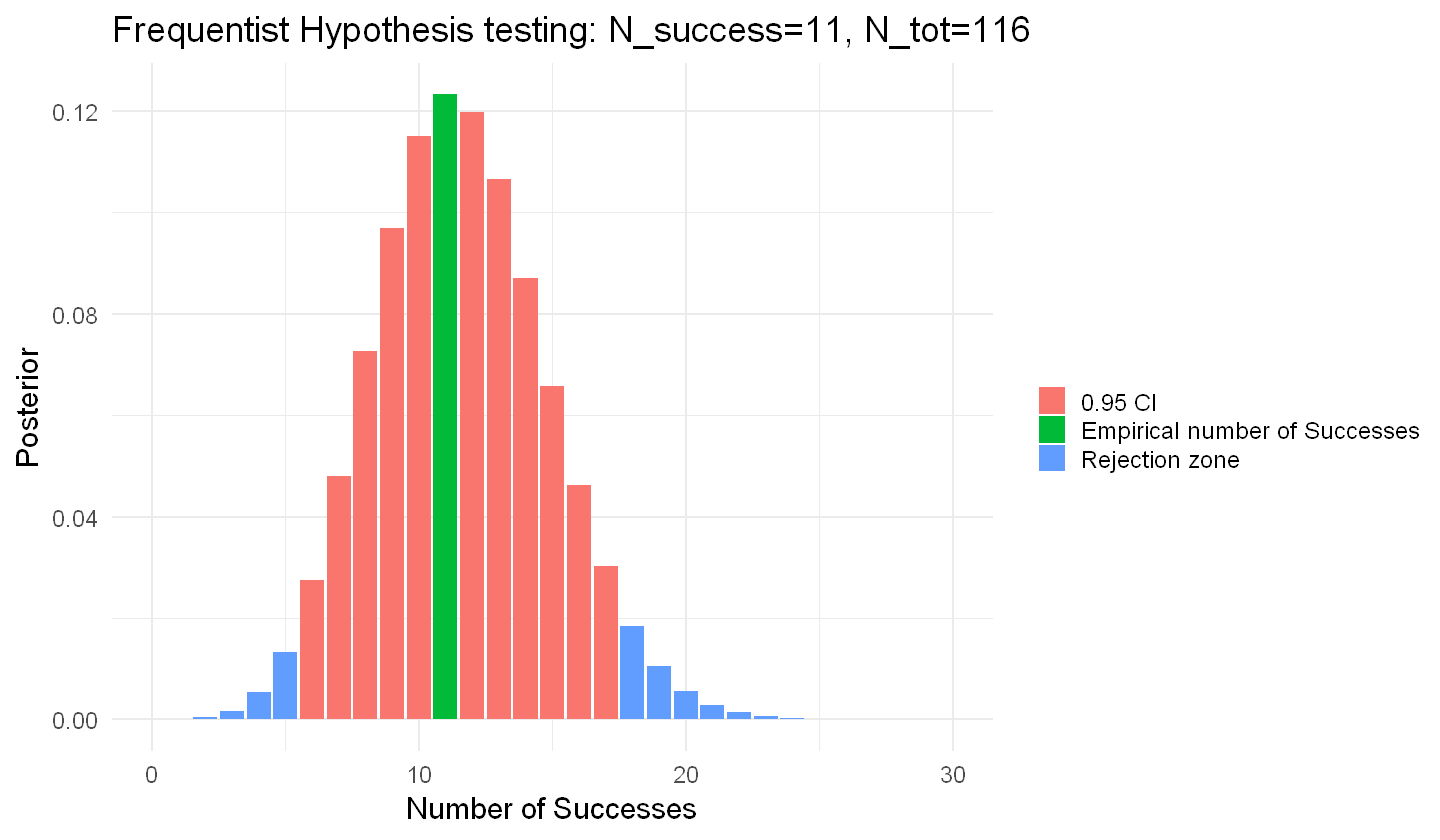

In [82]:
options(repr.plot.width=12, repr.plot.height=7)
h0.freq <- ggplot()+
    geom_col(aes(x=p, y=dbinom(p, n, 0.1), fill='0.95 CI'))+
    geom_col(aes(x=p[p.freq<=alpha/2], y=dbinom(p[p.freq<=alpha/2], n, 0.1), fill='Rejection zone'))+
    geom_col(aes(x=p[p.freq>=1-alpha/2], y=dbinom(p[p.freq>=1-alpha/2], n, 0.1), fill='Rejection zone'))+
    geom_col(aes(x=y, y=dbinom(y, n, 0.1), fill='Empirical number of Successes'))+
    xlim(0, 30)+
    labs(x='Number of Successes', y = 'Posterior', title='Frequentist Hypothesis testing: N_success=11, N_tot=116', fill='') +
    theme_minimal(base_size = 18)
h0.freq

**Bayesian approach**

In [84]:
cat('Since p=0.1 fall whithin the 95% CI (',beta_low,',',beta_up,') we CANNOT reject the null hypothesis.')

Since p=0.1 fall whithin the 95% CI ( 0.0467 , 0.1459 ) we CANNOT reject the null hypothesis.

**3.5)**

In [85]:
n <- 165
y <- 9

p_freq <- y/n
cat('The frequenties estimator is:', round(p_freq*100, 2), '%')

The frequenties estimator is: 5.45 %

**3.6)**

,Mean,Variance,l.ci,u.ci
,<dbl>,<dbl>,<dbl>,<dbl>
Prior: Beta,0.05681818,0.0003027677,0.0251,0.0914
Prior: Old posterior,0.05571848,0.0001538419,0.0325,0.0251


Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Warning message:
"Removed 7500 rows containing missing values or values outside the scale range (`geom_line()`)."
Warning message:
"Removed 7500 rows containing missing values or values outside the scale range (`geom_line()`)."


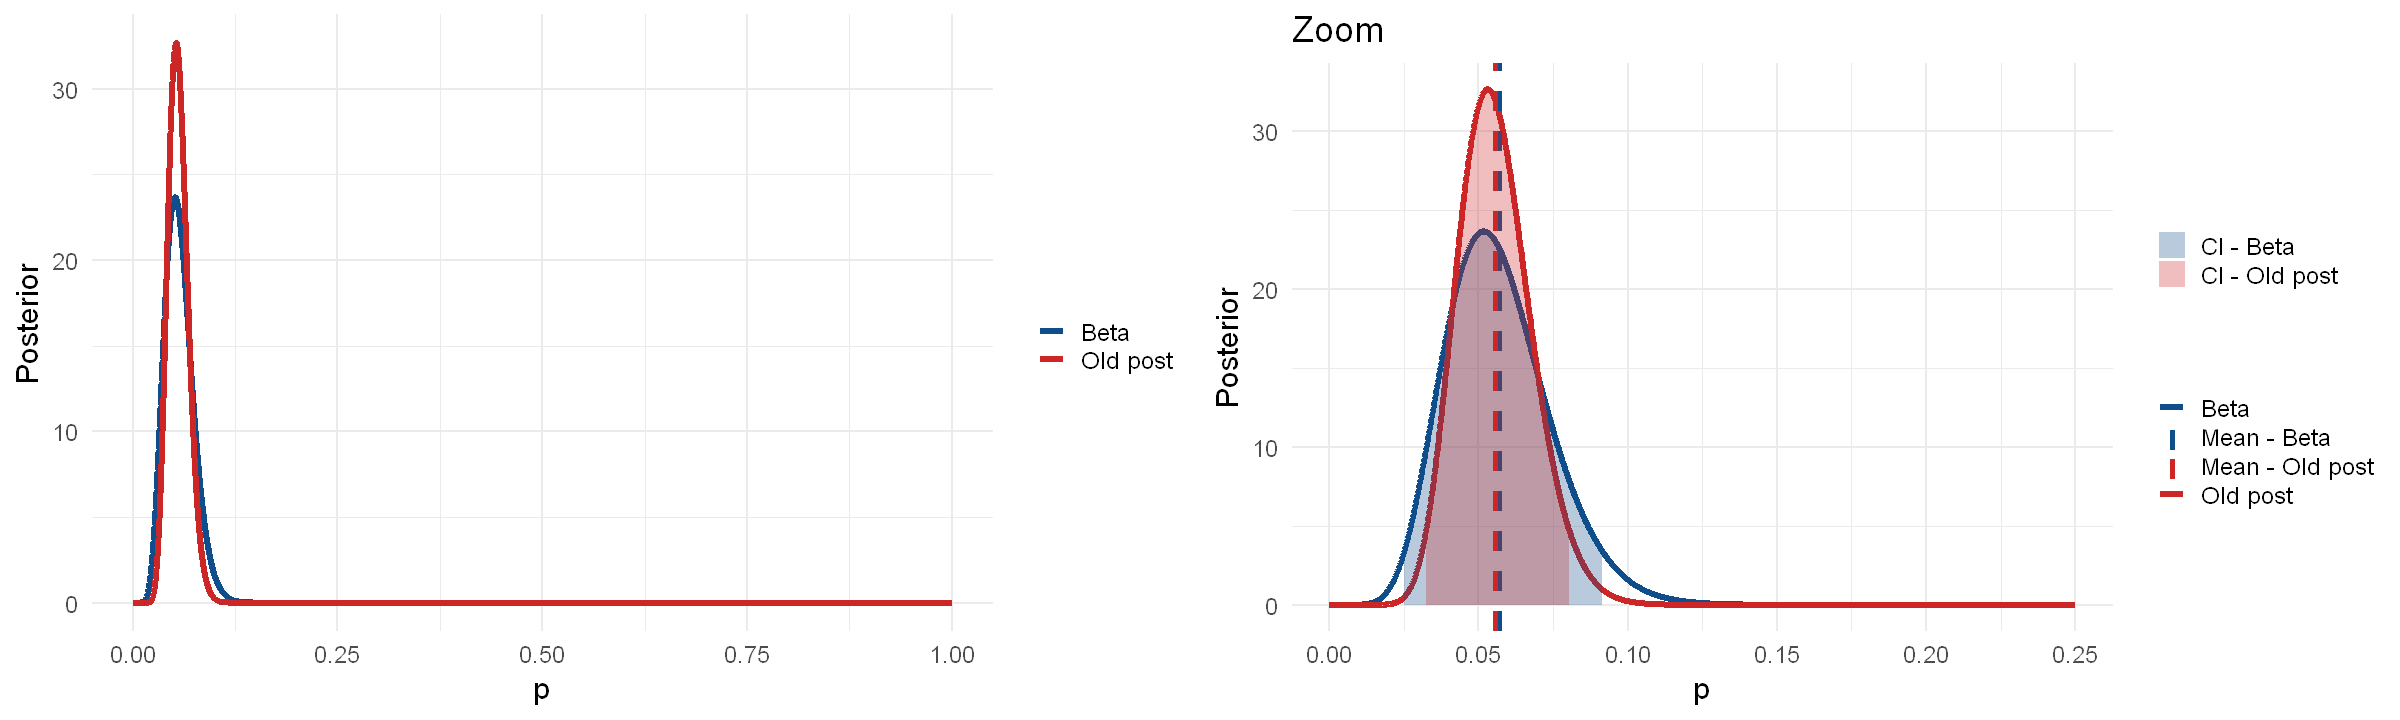

In [91]:
delta.t <- 0.0001
p <- seq(0, 1, by=delta.t)

#likelihood
p.like <- dbinom(y, n, prob=p)

#the two prior
p.beta_prior <- dbeta(p, 1, 10)
p.old_prior <- p.beta_post

#the two possible posterior 
p.beta_post <- (p.like * p.beta_prior) / (delta.t * sum(p.like * p.beta_prior))

p.old_post <- (p.like * p.old_prior) / (delta.t * sum(p.like * p.old_prior))

#find the two baiesian estimator for the two posterior 
beta_mean <- sum(p * p.beta_post) * delta.t
beta_var <- sum(((p-beta_mean)^2) * p.beta_post) * delta.t
beta_low <- ncredint(p, p.beta_post, level = 0.95)[['lower']]
beta_up <- ncredint(p, p.beta_post, level = 0.95)[['upper']]
beta_cred_int <- c(beta_low, beta_up)


old_mean <- sum(p * p.old_post) * delta.t
old_var <- sum(((p-old_mean)^2) * p.old_post) * delta.t
old_low <- ncredint(p, p.old_post, level=0.95)[['lower']]
old_up <- ncredint(p, p.old_post, level=0.95)[['upper']]
old_cred_int <- c(old_low, old_up) 

#print the result in a dataframe
result <- data.frame(
          Mean = c(beta_mean, old_mean),
          Variance = c(beta_var, old_var),
          l.ci = c(beta_low, old_low),
          u.ci = c(beta_up, beta_low),
          row.names = c('Prior: Beta', 'Prior: Old posterior')
)
result

options(repr.plot.width = 20, repr.plot.height = 6)
#plot the two posterior 
prior_plot <- ggplot()+
        geom_line(aes(p, p.beta_post, color='Beta'), lwd=1.7) +
        geom_line(aes(p, p.old_post, color='Old post'), lwd=1.7) +
        scale_color_manual(values = c('Beta' = 'dodgerblue4', 'Old post' = 'firebrick3')) +
        theme_minimal(base_size = 18) +
        labs(x='p', y='Posterior', color='')

prior_plot_zoom <- prior_plot +
        geom_vline(aes(xintercept=beta_mean, color = 'Mean - Beta'), linetype='dashed', lwd=1.5) + 
        geom_area(aes(x = p[p>beta_low & p<beta_up],
                      y = p.beta_post[p>beta_low & p<beta_up],   
                      fill='CI - Beta'), alpha=0.3) +

        geom_vline(aes(xintercept=old_mean, color='Mean - Old post'), linetype='dashed', lwd=1.5) +
        geom_area(aes(x = p[p>old_low & p<old_up],
                      y = p.old_post[p>old_low & p<old_up],   
                      fill='CI - Old post'), alpha=0.3) +
        scale_color_manual(values = c('Beta' = 'dodgerblue4', 'Old post' = 'firebrick3', 
                                      'Mean - Beta' = 'dodgerblue4', 'Mean - Old post' = 'firebrick3')) +
        scale_fill_manual(values = c('CI - Beta' = 'dodgerblue4', 'CI - Old post' = 'firebrick3')) +
        theme_minimal(base_size = 18) +   
        xlim(0, 0.25) + 
        labs(title='Zoom', color='', fill='')

grid.arrange(grobs=list(prior_plot, prior_plot_zoom), nrow=1, ncol=2)

**3.8)**

**Frequentist approach**

The closest we can get to alpha=0.05 is:  0.04532508 
The lower and upper limit to the 95% interval are: ( 8 ,  24 )
Since the number of successful events ( 9 ) fall whithin this range, we CANNOT reject the null hypotesis. 
Note that the measurement barely fall inside the confidence intervall. 

Warning message:
"Removed 137 rows containing missing values or values outside the scale range (`geom_col()`)."
Warning message:
"Removed 1 row containing missing values or values outside the scale range (`geom_col()`)."
Warning message:
"Removed 136 rows containing missing values or values outside the scale range (`geom_col()`)."


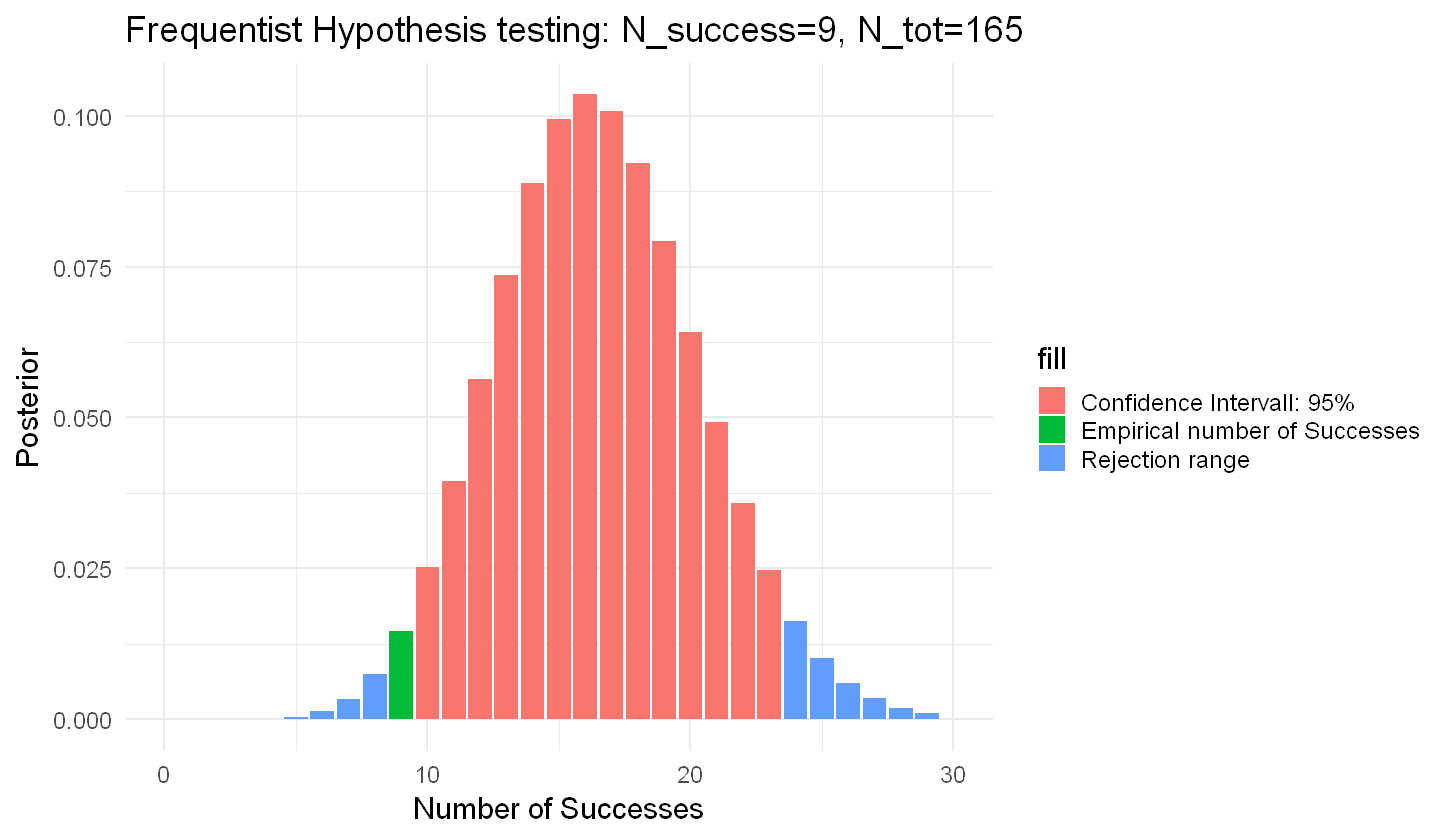

In [98]:
alpha = 0.05
p = seq(0, n, 1)
p.freq = pbinom(p, n, prob=0.1, lower.tail = TRUE)

lower.limit = max(p[p.freq<=alpha/2])
upper.limit = min(p[p.freq>=1-alpha/2])

alpha.star = p.freq[lower.limit] + 1 - p.freq[upper.limit]
cat('The closest we can get to alpha=0.05 is: ', alpha.star, '\n')
cat('The lower and upper limit to the 95% interval are: (', lower.limit, ', ', upper.limit, ')\n')
cat('Since the number of successful events (', y, ') fall whithin this range, we CANNOT reject the null hypotesis. \n')
cat('Note that the measurement barely fall inside the confidence intervall. ')

options(repr.plot.width=12, repr.plot.height=7)
h0.plot <- ggplot()+
    geom_col(aes(x=p, y=dbinom(p, n, 0.1), fill='Confidence Intervall: 95%'))+
    geom_col(aes(x=p[p.freq<=alpha/2], y=dbinom(p[p.freq<=alpha/2], n, 0.1), fill='Rejection range'))+
    geom_col(aes(x=p[p.freq>=1-alpha/2], y=dbinom(p[p.freq>=1-alpha/2], n, 0.1), fill='Rejection range'))+
    geom_col(aes(x=y, y=dbinom(y, n, 0.1), fill='Empirical number of Successes'))+
    xlim(0, 30) +
    labs(x='Number of Successes', y = 'Posterior', title='Frequentist Hypothesis testing: N_success=9, N_tot=165') +
    theme_minimal(base_size = 18)

h0.plot

**Bayesian approach**

In [101]:
cat('Using the old posterior as a prior:\n')
cat('Since p=0.1 DOES NOT fall whithin the 95% CI (',old_low,',',old_up,') we REJECT the null hypothesis.')

cat('\n')
cat('\nUsing the beta(1,10) as a prior:\n')
cat('since p=0.1 DOES NOT fall whithin the 95% CI (',beta_low,',',beta_up,') we REJECT the null hypothesis.')

Using the old posterior as a prior:
Since p=0.1 DOES NOT fall whithin the 95% CI ( 0.0325 , 0.0804 ) we REJECT the null hypothesis.

Using the beta(1,10) as a prior:
since p=0.1 DOES NOT fall whithin the 95% CI ( 0.0251 , 0.0914 ) we REJECT the null hypothesis.